<a href="https://colab.research.google.com/github/alter-sachin/ImageSynth/blob/master/feet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.callbacks.hooks import *
import fastai
from fastai.callbacks import SaveModelCallback

fastai.__version__

'1.0.61'

In [0]:
def function_name():
  print("sachin")
print("sachin")

sachin


In [0]:
%cd /content/drive/My\ Drive
#unzip captures1.zip
!ls

/content/drive/My Drive
 BuildAR			   'Project proposal  for Interiors.docx'
 captures			   'Project proposal _ Social_Square.docx'
 captures1.zip			   'Project proposal _ Social_Square.pdf'
'Colab Notebooks'		    train-jpg.tar.7z
'Getting started.pdf'		    train_v2.csv.zip
'Project proposal exteriors.docx'


In [0]:
path = Path('/content/drive/My Drive/captures')
path.ls()

[PosixPath('/content/drive/My Drive/captures/val'),
 PosixPath('/content/drive/My Drive/captures/train'),
 PosixPath('/content/drive/My Drive/captures/models'),
 PosixPath('/content/drive/My Drive/captures/test'),
 PosixPath('/content/drive/My Drive/captures/model'),
 PosixPath('/content/drive/My Drive/captures/model.pth'),
 PosixPath('/content/drive/My Drive/captures/1.onnx'),
 PosixPath('/content/drive/My Drive/captures/feet.onnx'),
 PosixPath('/content/drive/My Drive/captures/feet.pb'),
 PosixPath('/content/drive/My Drive/captures/feet2.pb'),
 PosixPath('/content/drive/My Drive/captures/export.pkl')]

In [0]:
import os
fnames=[]
files = os.listdir((path/'train'))
for file in files:
  if 'img' in file:
    fnames.append(file)
fnames

lbl_names=[]
files2 = os.listdir((path/'train'))
for file in files2:
  if 'layer' in file:
    lbl_names.append(file)
lbl_names



['03504_layer.png',
 '03500_layer.png',
 '03503_layer.png',
 '03513_layer.png',
 '03508_layer.png',
 '03497_layer.png',
 '03519_layer.png',
 '03499_layer.png',
 '03496_layer.png',
 '03501_layer.png',
 '03502_layer.png',
 '03507_layer.png',
 '03510_layer.png',
 '03506_layer.png',
 '03498_layer.png',
 '03514_layer.png',
 '03516_layer.png',
 '03515_layer.png',
 '03509_layer.png',
 '03512_layer.png',
 '03495_layer.png',
 '03530_layer.png',
 '03529_layer.png',
 '03531_layer.png',
 '03541_layer.png',
 '03535_layer.png',
 '03539_layer.png',
 '03544_layer.png',
 '03534_layer.png',
 '03521_layer.png',
 '03542_layer.png',
 '03524_layer.png',
 '03543_layer.png',
 '03522_layer.png',
 '03523_layer.png',
 '03536_layer.png',
 '03532_layer.png',
 '03525_layer.png',
 '03520_layer.png',
 '03538_layer.png',
 '03540_layer.png',
 '03526_layer.png',
 '03533_layer.png',
 '03537_layer.png',
 '03528_layer.png',
 '03527_layer.png',
 '03556_layer.png',
 '03557_layer.png',
 '03545_layer.png',
 '03558_layer.png',


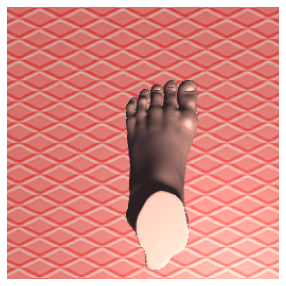

In [0]:
img_f = fnames[0]
img = open_image(path/'train'/img_f)
img.show(figsize=(5,5))

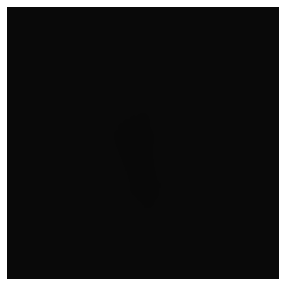

In [0]:
img_m = lbl_names[0]
img = open_image(path/'train'/img_m)
img.show(figsize=(5,5))

In [0]:
get_y_fn = lambda x : str(x).replace('img','layer')

In [0]:
%cd /content/drive/My Drive/captures/train


/content/drive/My Drive/captures/train


In [0]:
open_image(get_y_fn(img_f),convert_mode='L').data.unique()

tensor([0.0314, 0.0353])

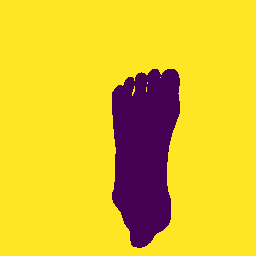

In [0]:
mask = open_mask(get_y_fn(img_f))
mask


In [0]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([256, 256]), tensor([[[9, 9, 9,  ..., 9, 9, 9],
          [9, 9, 9,  ..., 9, 9, 9],
          [9, 9, 9,  ..., 9, 9, 9],
          ...,
          [9, 9, 9,  ..., 9, 9, 9],
          [9, 9, 9,  ..., 9, 9, 9],
          [9, 9, 9,  ..., 9, 9, 9]]]))

In [0]:
code=np.array(["0","1","2","3","4","5","6","7","leg","plane"])

In [0]:
size = src_size
bs=8

In [0]:
def just_images(x):
  return 'img' in str(x)

In [0]:
%cd /content/drive/

/content/drive


In [0]:
src = (SegmentationItemList.from_folder(path).filter_by_func(just_images)
       .split_by_folder(train='train',valid='val')
       .label_from_func(get_y_fn, classes=code))
src

LabelLists;

Train: LabelList (3999 items)
x: SegmentationItemList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: SegmentationLabelList
ImageSegment (1, 256, 256),ImageSegment (1, 256, 256),ImageSegment (1, 256, 256),ImageSegment (1, 256, 256),ImageSegment (1, 256, 256)
Path: /content/drive/My Drive/captures;

Valid: LabelList (500 items)
x: SegmentationItemList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: SegmentationLabelList
ImageSegment (1, 256, 256),ImageSegment (1, 256, 256),ImageSegment (1, 256, 256),ImageSegment (1, 256, 256),ImageSegment (1, 256, 256)
Path: /content/drive/My Drive/captures;

Test: None

In [0]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

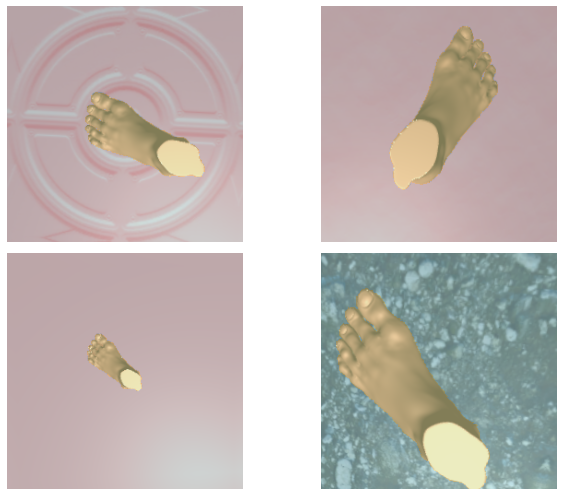

In [0]:
data.show_batch(2,figsize=(10,7))

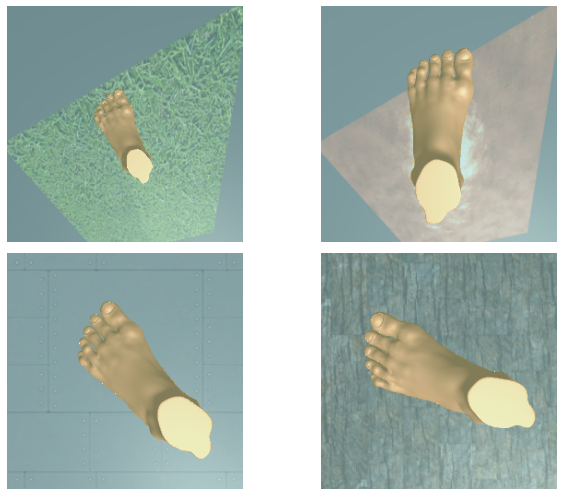

In [0]:
data.show_batch(2,figsize=(10,7),ds_type=DatasetType.Valid)

In [0]:
name2id = {v:k for k,v in enumerate(code)}
void_code = name2id['0']

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [0]:
metrics=acc_camvid

In [0]:
wd=1e-2

In [0]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

epoch,train_loss,valid_loss,acc_camvid,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


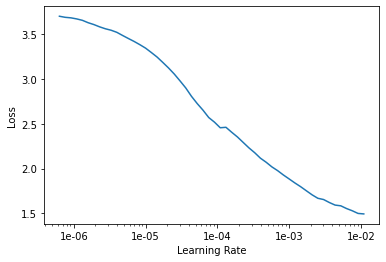

In [0]:
lr_find(learn)
learn.recorder.plot()

In [0]:
lr=1e-3

In [0]:
learn.fit_one_cycle(20, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.016399,0.013117,0.994982,03:25
1,0.008248,0.006817,0.997314,03:23
2,0.007951,0.006665,0.997442,03:24
3,0.005944,0.005315,0.997819,03:23
4,0.004852,0.003012,0.998850,03:23
5,0.004787,0.003641,0.998624,03:23
6,0.004205,0.002990,0.998903,03:22
7,0.004075,0.002347,0.999156,03:21
8,0.004139,0.002258,0.999189,03:21
9,0.003473,0.001960,0.999276,03:21


In [0]:
learn.save('stage-1')

In [0]:
learn.load('stage-1');

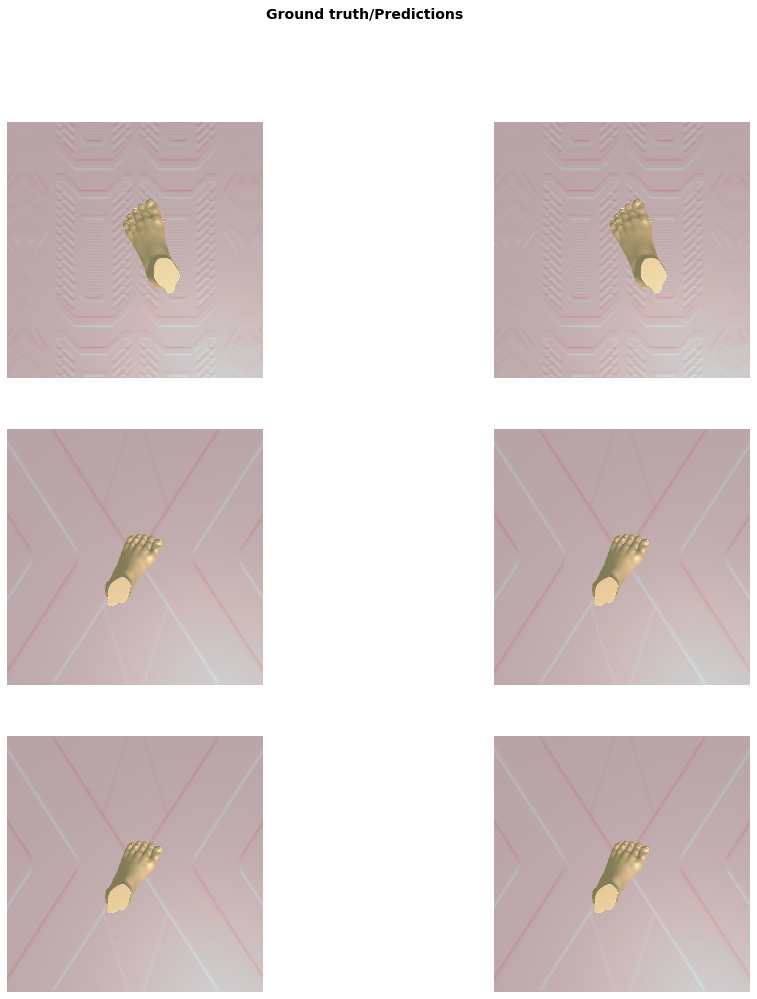

In [0]:
learn.show_results(rows=3, figsize=(16,16))

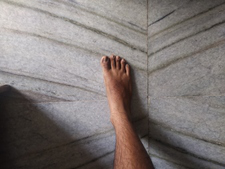

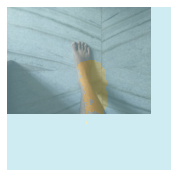

In [0]:
img=open_image((path/'test').ls()[1])
display(img)
#plt.imshow(learn.predict(img)[1].squeeze())
#learn.predict(img)#[1].squeeze()
img.show(y=learn.predict(img)[0])


'4.1.2'

In [0]:
learn.export()
learn.path

PosixPath('/content/drive/My Drive/captures')

In [0]:
torch.save(learn.model.state_dict(),path/'model.pth')

In [0]:
import torch.onnx
torch_model = learn.model.cuda()
dummy_input = torch.randn(1, 3, 224, 224).cuda()
torch.onnx.export(torch_model, dummy_input,path/'feet.onnx',export_params=True)
#trans1 = transforms.ToTensor()
#input1 = tf.convert_to_tensor(trans(trans1(img).convert("RGB")), dtype=tf.float32)
#torch_out = torch_model.cuda(trans)

/usr/local/lib/python3.6/dist-packages/fastai/vision/models/unet.py:31: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if ssh != up_out.shape[-2:]:


In [0]:
learn.unfreeze()

In [0]:
lrs = slice(lr/400,lr/4)

In [0]:
learn.fit_one_cycle(12, lrs, pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.002435,0.000955,0.999666,54:35
1,0.002357,0.000938,0.999671,04:00
2,0.002346,0.000933,0.999675,04:06
3,0.002287,0.000911,0.999681,04:05
4,0.002328,0.000905,0.999679,04:06
5,0.002301,0.000873,0.999694,04:06
6,0.002327,0.000836,0.999707,04:06
7,0.002234,0.000815,0.999717,04:06
8,0.002211,0.000799,0.999723,04:07
9,0.002149,0.000779,0.999728,04:06


In [0]:
learn.save('stage-2')

NameError: ignored

In [0]:
size=src_size
batch_size=8

In [0]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [0]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

In [0]:
learn.load('stage-2');

In [0]:
lr_find(learn)
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.8)

In [0]:
learn.save('stage-1-big')

In [0]:
learn.load('stage-1-big');

In [0]:
learn.unfreeze()

In [0]:
lrs = slice(1e-6,lr/10)

In [0]:
learn.fit_one_cycle(10, lrs)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.015460,0.012196,0.996159,00:49
1,0.014931,0.012506,0.996371,00:48
2,0.013254,0.010412,0.996502,00:48
3,0.011857,0.010406,0.996423,00:48
4,0.077852,0.075771,0.985017,00:48
5,0.026982,0.014773,0.995944,00:48
6,0.027487,0.020065,0.995446,00:48
7,0.028959,0.019453,0.995203,00:48
8,0.023016,0.016830,0.995815,00:48
9,0.020881,0.016406,0.995807,00:48


In [0]:
learn.save('stage-2-big')

In [0]:
learn.load('stage-2-big');

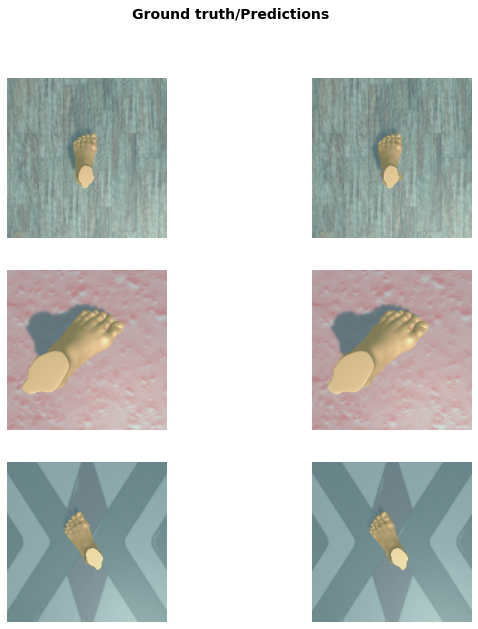

In [0]:
learn.show_results(rows=3, figsize=(10,10))

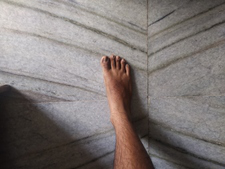

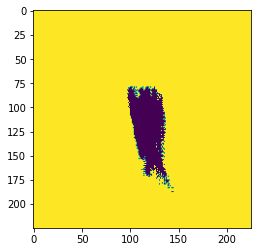

In [0]:
img=open_image((path/'test2').ls()[2])
display(img)
plt.imshow(learn.predict(img)[1].squeeze())

In [0]:
learn.export()

AttributeError: ignored